## WeRateDogs Data Wrangling Project


In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline

## Part I. Gather Data

In [2]:
# Read in 1st dataset 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Use requests library to programmatically download the tsv file
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
# Read in 2nd dataset 
image_predictions = pd.read_csv('image_predictions.tsv', delimiter = '\t')

In [5]:
# use tweepy to query Twitter's API and hide the API info here

consumer_key = 'AgkmAnIUf3JKY2G6pA8uxOe1p'
consumer_secret = '0useHSXYrmMXiNZ8SzMKz5aDWJRfTZ9ZU1czwtSZ2mz7YKgpkr'
access_token = '730600829107896324-9460IUvQC95MZ7H2YwPgUacwMnE6y5f'
access_secret = 'yr8UcFXiMTl4bohMSGPFdHB4nz9q16esBUqXjQt2SVikG'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# set Twitter's rate limit
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


In [6]:
# write the querying JSON data into tweet_json.txt
with open('tweet_json.txt','a',encoding = 'utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended') # set mode to extended
            json.dump(tweet._json, f)
            f.write('\n')
        except: 
            print('error')

error
error
error
error
error
error
error
error
error
error
error


Rate limit reached. Sleeping for: 772
Rate limit reached. Sleeping for: 778


In [7]:
# Create a empty list for insert each tweet info into it
tweets = []

tweet_json = open('tweet_json.txt', 'r')

for line in tweet_json:
    tweet = json.loads(line)
    tweets.append(tweet)
    
tweet_json.close()

In [8]:
print(tweets[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [9]:
"""
We can see lots of information from 'tweet_json' above, but here I'm only focus on certain features, 
such as 'retweet_count', 'favorite_count', and of course 'id' for table merge. 
"""

tweet_data = pd.DataFrame()  # create a empty dataframe for map the tweet_data info 

tweet_data['id'] = list(map(lambda tweet: tweet['id'], tweets))

tweet_data['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets))

tweet_data['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets))


In [10]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8586,38805
1,892177421306343426,6308,33238
2,891815181378084864,4190,25026
3,891689557279858688,8704,42166
4,891327558926688256,9469,40333


## Part 2. Assess Data

###  twitter_archive

In [11]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
twitter_archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [13]:
# check the datatypes and find some datatypes need to be fixed
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# set the display colwitdth for seeing the entire text contents
pd.set_option('display.max_colwidth', -1)
twitter_archive['text'].head()

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                 
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                           
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

In [15]:
# total missing values for each features
twitter_archive.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [16]:
twitter_archive.name.str.islower().sum()

109

In [17]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
twitter_archive.rating_denominator.value_counts()
# 10 is the standard rating_denominator, other numbers could be errors

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [19]:
twitter_archive.rating_numerator.value_counts()
# some extreme values such as 420, 1776 could be errors 

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [20]:
twitter_archive.source.value_counts()
# main source is iphone but the urls are not readable for human; this could be use to analyze in the last part

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

### image_predictions

In [21]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [23]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
German_shepherd              20 
Staffordshire_bullterrier    20 
Siberian_husky               20 
Cardigan                     19 
web_site                     19 
Maltese_dog                  18 
beagle                       18 
Shetland_sheepdog            18 
Eskimo_dog                   18 
teddy                        18 
Lakeland_terrier             17 
Rottweiler                   17 
Shih-Tzu                     17 
kuvasz                       16 
Italian_greyhound            16 
          

In [24]:
image_predictions.info()
# all variables have 2075 records; no missing values here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### tweet_data

In [26]:
tweet_data.tail()

,id,retweet_count,favorite_count
2340,666049248165822465,40,109
2341,666044226329800704,141,299
2342,666033412701032449,44,125
2343,666029285002620928,46,130
2344,666020888022790149,517,2558


In [27]:
tweet_data.sort_values(['retweet_count'], ascending= 0)[0:5]
# Top 5 retweet_count records

,id,retweet_count,favorite_count
1028,744234799360020481,77341,128265
525,807106840509214720,61084,122984
807,770743923962707968,50863,0
1068,739238157791694849,50862,73308
404,822872901745569793,49116,143381


In [28]:
tweet_data = tweet_data.drop_duplicates()
# no missing valyues and all data type is integer

In [29]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 3 columns):
id                2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 73.3 KB


## Cleaning Plan Summary
- Inspecting data set for two things: data quality issues and lack of tidiness
- Quality Isssues means content issues like missing, duplicate, or incorrect data
- Untidy Data has specific structural issues

### Tidiness Issues
- Columns 'doggo', 'floofer', 'pupper', 'puppo' in `twitter_archive` should belong to one colomn -- stage
- The`tweet_data` table need to merge into the `twitter_archive` table.


### Quality Issues

##### `twitter_archive` table

1. Some columns have huge amount of missing values, for example, "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp". Since I don't need in_reply and retweet data in this project, I perfer to delete those columns directly. 

2. The varaible "expanded_urls" also has few missing values, which means some records had no images. Any ratings without images should not be taking into account.

3. The datatype of "timestamp" is not correct.

4. Optimize the source contents for human reading habit; change the long url links to certain words.

5. The standard for "rating_denominator" is 10, but it includes some other numbers, which could be the misparse.

6. The "rating_numerator" also has some incorrect values.

7. Some dog name are incorrect. 

8. The dog names are sometimes first letter capital but sometimes not. Keep the name format consistent.



##### `image_predictions` table

1. The columns'names are not clear and straightforward such as p1,p2.
2. The prediction dog breeds involve both uppercase and lowercase for the first letter.



## Part 3. Clean Data

In [65]:
# make copies for cleaning
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

### `twitter_archive` table


#### Tidness Issue 1 Define : Create a new variable - stage to show the four dog stages, drop the four colomns, and fill the empty

#### Code

In [66]:
twitter_archive_clean[twitter_archive_clean['doggo'] == 'None'].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [67]:
# use a for loop to replace all the 'None' before cat
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        twitter_archive_clean[i] = twitter_archive_clean[i].replace('None', '')
        

In [68]:
# use cat to combine 
twitter_archive_clean['stage'] = twitter_archive_clean.doggo.str.cat(twitter_archive_clean.floofer).str.cat(twitter_archive_clean.pupper).str.cat(twitter_archive_clean.puppo)

# drop the four old colomns
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('', np.nan)


#### Test

In [69]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
735,781163403222056960,NaN,NaN,2016-09-28 16:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","We normally don't rate lobsters, but this one appears to be a really good lobster. 10/10 would pet with caution https://t.co/YkHc7U7uUy",NaN,NaN,NaN,https://twitter.com/dog_rates/status/781163403222056960/photo/1,10,10,None,NaN
2163,669375718304980992,NaN,NaN,2015-11-25 04:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Billl. He's trying to be a ghost but he's not very good at it. 6/10 c'mon Billl https://t.co/ero0XfdGtY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669375718304980992/photo/1,6,10,Billl,NaN
388,826598365270007810,NaN,NaN,2017-02-01 01:09:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pawnd... James Pawnd. He's suave af. 13/10 would trust with my life https://t.co/YprN62Z74I,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/826598365270007810/photo/1,https://twitter.com/dog_rates/status/826598365270007810/photo/1,https://twitter.com/dog_rates/status/826598365270007810/photo/1",13,10,Pawnd,NaN
2184,668988183816871936,NaN,NaN,2015-11-24 03:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Honor to rate this dog. Lots of fur on him. Two massive tumors on back. Should get checked out. Very neat tho. 7/10 https://t.co/bMhs18elNF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668988183816871936/photo/1,7,10,None,NaN
2142,669972011175813120,NaN,NaN,2015-11-26 20:12:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we see really big dog cuddling smaller dog. Very touching. True friendship. 10/10s would pet both at once https://t.co/A6XnvxHiUQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669972011175813120/photo/1,10,10,None,NaN


In [70]:
print(twitter_archive_clean.shape)
print(twitter_archive.shape)

(2356, 14)
(2356, 17)


#### Tidness Issue 2 Define : Merge the `tweet_data` into the `twitter_archive`. 

#### Code

In [71]:
# rename the 'id' from `tweet_data` in preparing for table join
tweet_data.rename(columns={'id': 'tweet_id'}, inplace = True)

# check the number of foreign key in two tables
print(twitter_archive_clean.tweet_id.count())
print(tweet_data.tweet_id.count())


2356
2345


In [72]:
# join two tables on 'tweet_id' and use inner join method
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_data, on='tweet_id', how = 'inner')

#### Test

In [73]:
twitter_archive_clean.tweet_id.count()

2345

In [74]:
# drop the duplicates due to join
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

In [75]:
print(twitter_archive_clean.tweet_id.count())
print(tweet_data.tweet_id.count())

2345
2345


In [76]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 16 columns):
tweet_id                      2345 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2345 non-null object
source                        2345 non-null object
text                          2345 non-null object
retweeted_status_id           170 non-null float64
retweeted_status_user_id      170 non-null float64
retweeted_status_timestamp    170 non-null object
expanded_urls                 2286 non-null object
rating_numerator              2345 non-null int64
rating_denominator            2345 non-null int64
name                          2345 non-null object
stage                         379 non-null object
retweet_count                 2345 non-null int64
favorite_count                2345 non-null int64
dtypes: float64(4), int64(5), object(7)
memory usage: 311.4+ KB


#### Quality Issue 1 Define : Remove all the unnecessary columns directly

#### Code

In [77]:
# drop the columns unnecessary and contain huge amount of missing data
columns_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id', 'in_reply_to_user_id']

twitter_archive_clean = twitter_archive_clean.drop(columns_drop, axis = 1)

#### Test

In [78]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 11 columns):
tweet_id              2345 non-null int64
timestamp             2345 non-null object
source                2345 non-null object
text                  2345 non-null object
expanded_urls         2286 non-null object
rating_numerator      2345 non-null int64
rating_denominator    2345 non-null int64
name                  2345 non-null object
stage                 379 non-null object
retweet_count         2345 non-null int64
favorite_count        2345 non-null int64
dtypes: int64(5), object(6)
memory usage: 219.8+ KB


#### Quality Issue 2 Define : Remove the records with no images infomation

#### Code

In [79]:
# drop the 59 records without images 
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['expanded_urls'])

#### Test

In [80]:
twitter_archive_clean.expanded_urls.isnull().sum()

0

#### Quality Issue 3 Define : Change the datatype of 'timestamp' to datetime

#### Code

In [81]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [82]:
twitter_archive_clean['timestamp'].head(3)

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
Name: timestamp, dtype: datetime64[ns]

#### Quality Issue 4 Define : Optimize the source contexts

#### Code

In [83]:
twitter_archive_clean['source'].value_counts()

# Four types of source: Twitter for iphone / Vine - Make a Scene / Twitter Web Client / TweetDeck

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2152
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     32  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [84]:
# simpfy the source contexts
       
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                                          'Vine - Make a Scene')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')

# change the type of source to category for preparing later visualization
#twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

#### Test

In [85]:
twitter_archive_clean['source'].value_counts()

Twitter for iphone     2152
Vine - Make a Scene    91  
Twitter Web Client     32  
TweetDeck              11  
Name: source, dtype: int64

#### Quality Issue 5 Define : 10 is the default value of rating_denominator, then correct the wrong values based on the corresponding text.

#### Code

In [86]:
twitter_archive_clean.rating_denominator.value_counts()

10     2268
50     3   
11     2   
80     2   
7      1   
170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
2      1   
Name: rating_denominator, dtype: int64

In [87]:
# filter the wrong rating_denominator values

df1 = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]

df1[['tweet_id','text','rating_numerator','rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
424,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
507,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
891,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1057,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1109,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1154,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1191,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1217,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1243,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1263,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [95]:
# tweet_id : 740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, ['rating_denominator']] = 10


#### Test

In [96]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
1057,740373189193256964,2016-06-08 02:41:38,Twitter for iphone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,10,None,NaN,14609,37131


#### Quality Issue 6 Define : Correct the rating_numerator values from the text information

#### Code

In [97]:
# tweet_id : 740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, ['rating_numerator']] = 14
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, ['rating_numerator']] = 13
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, ['rating_numerator']] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, ['rating_numerator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, ['rating_numerator']] = 9

#### Test

In [98]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
1057,740373189193256964,2016-06-08 02:41:38,Twitter for iphone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,None,NaN,14609,37131


#### Quality Issue 7 Define : Change the frequent incorrect dog name to None

#### Code

In [99]:
twitter_archive_clean['name'].value_counts().head(10)
# it shows that  it has lots of missing values in name and "a" is even not a name

None       681
a          55 
Charlie    12 
Oliver     11 
Lucy       11 
Cooper     11 
Lola       10 
Penny      10 
Tucker     10 
Winston    9  
Name: name, dtype: int64

In [100]:
# choose the most frequent incorrect dog name and set them as None
not_name_list = ['a','the','an']
for i in not_name_list:
        twitter_archive_clean['name'].replace(i, 'None', inplace=True)
    

#### Test

In [101]:
twitter_archive_clean['name'].value_counts().head(10)

None       751
Charlie    12 
Lucy       11 
Oliver     11 
Cooper     11 
Penny      10 
Lola       10 
Tucker     10 
Bo         9  
Winston    9  
Name: name, dtype: int64

#### Quality Issue 8 Define : Capitalize the first letter of dog name

#### Code

In [102]:
twitter_archive_clean['name'].str.islower().sum()

38

In [103]:
twitter_archive_clean['name'] = twitter_archive_clean.name.str.capitalize()

#### Test

In [104]:
twitter_archive_clean['name'].str.islower().sum()

0

### `image_predictions` table

#### Quality Issue 9 Define :  Change the column names

In [105]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Code

In [106]:
# change the column names
image_predictions.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

#### Test

In [107]:
image_predictions.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Quality Issue 10 Define :  Capitalize the first letter of first prediction (I could do that for all the predictions, but I decide only apply to the first prediction since this variable is the important one)

In [108]:
image_predictions['first_prediction'] = image_predictions.first_prediction.str.capitalize()

In [109]:
image_predictions.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [110]:
image_predictions['first_prediction'].value_counts().head(10)

Golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
Pug                   57 
Chow                  44 
Samoyed               43 
Toy_poodle            39 
Pomeranian            38 
Cocker_spaniel        30 
Name: first_prediction, dtype: int64

### Final Tests

In [111]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2286 entries, 0 to 2344
Data columns (total 11 columns):
tweet_id              2286 non-null int64
timestamp             2286 non-null datetime64[ns]
source                2286 non-null object
text                  2286 non-null object
expanded_urls         2286 non-null object
rating_numerator      2286 non-null int64
rating_denominator    2286 non-null int64
name                  2286 non-null object
stage                 373 non-null object
retweet_count         2286 non-null int64
favorite_count        2286 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 214.3+ KB


In [112]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id             2075 non-null int64
jpg_url              2075 non-null object
img_num              2075 non-null int64
first_prediction     2075 non-null object
first_confidence     2075 non-null float64
first_dog            2075 non-null bool
second_prediction    2075 non-null object
second_confidence    2075 non-null float64
second_dog           2075 non-null bool
third_prediction     2075 non-null object
third_confidence     2075 non-null float64
third_dog            2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Store


In [113]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8')

## Analyze and Visualize

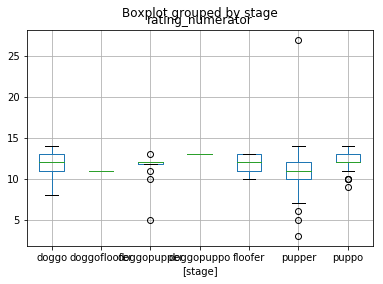

In [114]:
twitter_archive_clean.boxplot(column=['rating_numerator'], by=['stage'])

## Reference

Twitter API Guide:
https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/

Tweepy documentation:
https://media.readthedocs.org/pdf/tweepy/latest/tweepy.pdf

WeRateDogs Twitter:
https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor